Problem Statement:
A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
# from pingouin import pairwise_tukey
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler 

In [9]:
df=pd.read_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Module _Projects_GL/Advance_Statistics/Fever-1.csv')
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


A and B has three levels .A ,B and Volunteer has 4 levels are the independent variables and Relief is the target variable.

Lets check the data type of data 

In [14]:
df.dtypes

A              int64
B              int64
Volunteer      int64
Relief       float64
dtype: object

A ,B and Volunteer are integer data types while relief is float variable

In [15]:
df.columns

Index(['A', 'B', 'Volunteer', 'Relief'], dtype='object')

For ANOVA the independent variable should be categorical and only target variable should be continous .So we need to convert all the three integer independent variables data types to object category type.

In [16]:
df.astype("category")

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6
5,1,2,2,4.2
6,1,2,3,4.9
7,1,2,4,4.7
8,1,3,1,4.8
9,1,3,2,4.5


State Null and Alternative hypothesis for conducting One way ANOVA for both the variables 'A' and 'B' individually.

# Variable A
Null hypothesis states that there will be no effect of ingredient A at any level in relief of Hay fever.
Alternate hypothesis states that there will be effect of ingredient A at on atleast one levelin relief of Hay fever.

H0: µA1=µA2=µA3
HA: µA1=µA2!=µA3
or
µA1!=µA2=µA3


 Perform One-way ANOVA for variable A with respect to the variable"Relief"

In [18]:
alpha_value=0.05

In [20]:
formula = 'Relief ~ A'
model = ols(formula, data=df).fit()
aov_table1 = sm.stats.anova_lm(model,type=1)
print(aov_table1)

            df   sum_sq     mean_sq          F        PR(>F)
A          1.0  212.415  212.415000  44.494409  1.175871e-07
Residual  34.0  162.315    4.773971        NaN           NaN


Interpretation:
The p-value obtained from ANOVA analysis for A ingredient is statistically significant as p -value is less than 0.05.
We conclude that all the levels of A ingredients significantly affect the relief outcomes.
It means that there is effect of A at least one level on Relief of Hay fever.
If p-value is less than alpha value ,we have evidence to reject the null hypothesis since the p-value is less than level of significance.
If p-value is greater than alpha value ,we have no evidence to reject the null hypothesis since the p-value is greater than level of significance.



Perform One-way ANOVA for variable B with respect to the variable"Relief"

Variable B Null hypothesis states that there will be no effect of ingredient B at any level in relief of Hay fever. Alternate hypothesis states that there will be effect of ingredient B at on atleast one levelin relief of Hay fever.

H0: µB1=µB2=µB3 HA: µB1=µB2!=µB3 or µB1!=µB2=µB3

In [21]:
alpha_value=0.05

In [22]:
formula = 'Relief ~ B'
model = ols(formula, data=df).fit()
aov_table2 = sm.stats.anova_lm(model,type=1)
print(aov_table2)

            df   sum_sq     mean_sq          F    PR(>F)
B          1.0  113.535  113.535000  14.778958  0.000505
Residual  34.0  261.195    7.682206        NaN       NaN


Type=1 for one way ANOVA

Interpretation: The p-value obtained from ANOVA analysis for B ingredient is statistically significant as p -value is less than 0.05. We conclude that all the levels of B ingredients significantly affect the relief outcomes. It means that there is effect of B at least one level on Relief of Hay fever. If p-value is less than alpha value ,we have evidence to reject the null hypothesis since the p-value is less than level of significance. If p-value is greater than alpha value ,we have no evidence to reject the null hypothesis since the p-value is greater than level of significance.

Analyzing the effect of one variable on other variable using interaction plot.
For interaction plot we use pointplots from sns library .


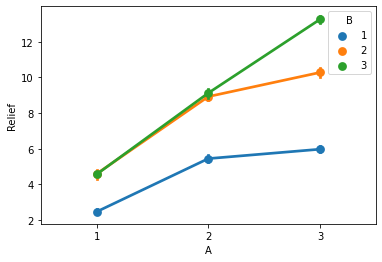

In [23]:
sns.pointplot(x='A', y='Relief', data=df, hue='B')

Interaction Plot with confidence Intervals :
When the two lines are parallel means no interaction between the variables .
But here we can see green(level3) and orange (level 2)lines are merging and then diverging at some point .All the three lines are not parallel means there is some interaction between them .
The interaction between A and B at the three levels 1,2 and 3.


Interaction Plot without confidence interval

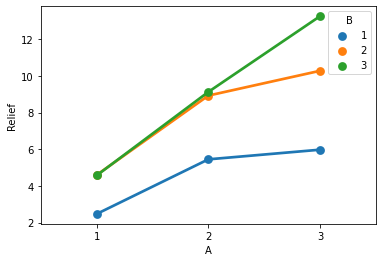

In [24]:
sns.pointplot(x='A', y='Relief', data=df, hue='B',ci=None)

Conclusion :
Interaction effect occurs when the effect of one variables depends on the value of another variable.
Interaction effects are common in regression analysis,ANOVA.
Interaction effect indicates that the third variables influences the relationship between the independent and dependant variable.
This type of effect makes the model more complex and in real world such models are not incorporated.
Relief outcomes changes according to the levels of two ingredients A and B.
In this interaction plot the lines are not parallel.
The interaction effect is present which indicates a relationship between variable A and variable B at some level.



Perform Two-way ANOVA based on different ingredients A and B variables.

Type 2 fro Two way ANOVA

In [26]:
formula = 'Relief ~ A+B+A*B'
model = ols(formula, data=df).fit()
aov_table3 = sm.stats.anova_lm(model,type=2)
print(aov_table3)

            df      sum_sq     mean_sq           F        PR(>F)
A          1.0  212.415000  212.415000  308.976050  5.307332e-18
B          1.0  113.535000  113.535000  165.146510  3.529911e-14
A:B        1.0   26.780625   26.780625   38.954743  5.406597e-07
Residual  32.0   21.999375    0.687480         NaN           NaN


Interaction effect is written as A*B or A:B
Interpretation :
The p-value obtained from ANOVA analysis for A ,B and interactions are statistically significant (p-value<0.05).
We conclude that the type of levels of A and B ingredient significantly affects the relief outcome as well as the interaction of both A and B ingredients significantly affects the relief outcome.


Business Implication of performing ANOVA analysis for Hay fever relief case study:
ANOVA test allows the comparision between more than two groups at the same time and to determine a relationship exist between them.
ANOVA analysis helps to determine the variability between samples and within samples.
In this case study to creat an effective compound for Hay fever relief,ANOVA analysis would help to study the amount and proportions of two ingredients and its effect on relief outcome.
With ANOVA analysis we can mange the relief of Hay fever by controlling the levels of A and B ingredients .

The END!